# IMPORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import re 
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

C:\Users\KiranDon\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\KiranDon\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://n

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# Loading data and Pre-Processing

In [3]:
# data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data.csv", sep='\t')
data = pd.read_csv("data.tsv", sep='\t')
data.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [4]:
data.tail()

,id,tweet,label
6416,6417,???Autopsies prove that COVID-19 is??� a blood...,fake
6417,6418,_A post claims a COVID-19 vaccine has already ...,fake
6418,6419,Aamir Khan Donate 250 Cr. In PM Relief Cares Fund,fake
6419,6420,It has been 93 days since the last case of COV...,real
6420,6421,The House Democratic Caucus holds a moment of ...,real


In [5]:
import string

In [6]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

# Removing punctuations
data['tweet']= data['tweet'].apply(lambda x:remove_punctuation(x))


# Converting text into lower case
data['tweet']= data['tweet'].apply(lambda x: x.lower())


def remove_stopwords(text):
    text = text.split(" ")
    output= " ".join([i for i in text if i not in stopwords])
    return output

stopwords = nltk.corpus.stopwords.words('english')

# Removing stopwords
for i in range(len(data)):
    data["tweet"][i] = remove_stopwords(data["tweet"][i])
    

# Removing urls.....
for i in range(len(data)):
    temp = data["tweet"][i].split(" ")
    if temp[-1].startswith("http"):
        temp.pop()
    data["tweet"][i] = " ".join(temp)

C:\Users\KiranDon\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\KiranDon\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
data.head()

,id,tweet,label
0,1,cdc currently reports 99031 deaths general dis...,real
1,2,states reported 1121 deaths small rise last tu...,real
2,3,politically correct woman almost uses pandemic...,fake
3,4,indiafightscorona 1524 covid testing laborator...,real
4,5,populous states generate large case counts loo...,real


# Count Vectorizer

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [9]:
x = data['tweet']
y = data['label']
# print(y)

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=53)

In [11]:
count_vectorizer = CountVectorizer(stop_words = 'english')

In [12]:
count_train = count_vectorizer.fit_transform(x_train)

In [13]:
count_test = count_vectorizer.transform(x_test)

In [14]:
print(count_vectorizer.get_feature_names()[:10])

['000', '003', '0054', '006', '01', '0106', '01072020', '011', '014', '02']


# TfidfVectorizer for text classification

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english' , max_df = 0.7)

In [17]:
tfidf_train  = tfidf_vectorizer.fit_transform(x_train)

In [18]:
tfidf_test = tfidf_vectorizer.transform(x_test)

In [19]:
print(tfidf_vectorizer.get_feature_names()[:10])

['000', '003', '0054', '006', '01', '0106', '01072020', '011', '014', '02']


In [20]:
print(tfidf_train.A[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Inspecting the vectors

In [21]:
count_df =  pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [22]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [23]:
print(count_df.head())

   000  003  0054  006  01  0106  01072020  011  014  02  ...  बह  वध  ಡನ  \
0    0    0     0    0   0     0         0    0    0   0  ...   0   0   0   
1    0    0     0    0   0     0         0    0    0   0  ...   0   0   0   
2    0    0     0    0   0     0         0    0    0   0  ...   0   0   0   
3    0    0     0    0   0     0         0    0    0   0  ...   0   0   0   
4    0    0     0    0   0     0         0    0    0   0  ...   0   0   0   

   ನಗಳಲ  張展  監獄絕食抗議  被監視居住  陳秋實  𝗰𝗼𝗺𝗽𝗹𝗲𝘁𝗲𝗹𝘆  𝗶𝗻𝗮𝗰𝘁𝗶𝘃𝗮𝘁𝗲  
0     0   0       0      0    0           0           0  
1     0   0       0      0    0           0           0  
2     0   0       0      0    0           0           0  
3     0   0       0      0    0           0           0  
4     0   0       0      0    0           0           0  

[5 rows x 16131 columns]


In [24]:
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

set()


In [25]:
print(count_df.equals(tfidf_df))

False


# Model Building

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=53)

### Training and testing the "covid fake news" model with CountVectorizer

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, f1_score
from sklearn.pipeline import Pipeline

In [28]:
nb_classifier = MultinomialNB()

In [29]:
nb_classifier.fit(count_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [30]:
pred = nb_classifier.predict(count_test)

In [31]:
accuracyScore = accuracy_score(y_test,pred)
f1Score = f1_score(y_test, pred, average="macro")

In [32]:
print("Accuracy Score: {}".format(accuracyScore))
print("f1 Score: {}".format(f1Score))

Accuracy Score: 0.9175738724727839
f1 Score: 0.9174172755140368


In [33]:
cm = confusion_matrix(y_test,pred,labels=['fake','real'])

In [34]:
print(cm)

[[281  30]
 [ 23 309]]


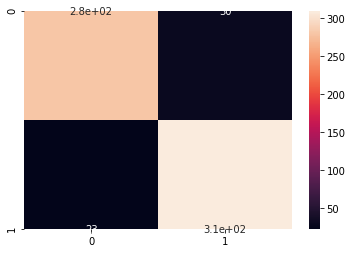

In [35]:
sns.heatmap(cm,annot=True)

### Training and testing the "covid fake news" model with TfidfVectorizer

In [36]:
nb_classifier = MultinomialNB()

In [37]:
nb_classifier.fit(tfidf_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [38]:
pred = nb_classifier.predict(tfidf_test)
# print(pred)

In [39]:
accuracyScore = accuracy_score(y_test,pred)
f1Score = f1_score(y_test, pred, average="macro")

In [40]:
print("Accuracy Score: {}".format(accuracyScore))
print("f1 Score: {}".format(f1Score))

Accuracy Score: 0.9020217729393468
f1 Score: 0.901560825538926


In [41]:
cm = confusion_matrix(y_test,pred,labels=['fake','real'])

In [42]:
print(cm)

[[268  43]
 [ 20 312]]


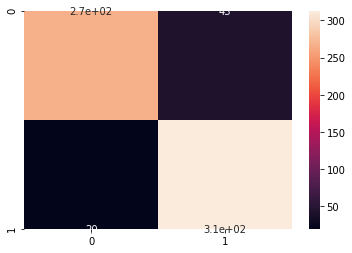

In [43]:
sns.heatmap(cm,annot=True)

In [44]:
# pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),('nbmodel', MultinomialNB())])
pipeline = Pipeline([('countvectorizer', CountVectorizer(stop_words = 'english')),('nbmodel', MultinomialNB())])

In [45]:
pipeline.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nbmodel',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [46]:
pred = pipeline.predict(x_test)

In [47]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        fake       0.92      0.90      0.91       311
        real       0.91      0.93      0.92       332

    accuracy                           0.92       643
   macro avg       0.92      0.92      0.92       643
weighted avg       0.92      0.92      0.92       643



In [48]:
print(confusion_matrix(y_test, pred))

[[281  30]
 [ 23 309]]


# Saving The Model

In [49]:
import pickle

In [50]:
with open('model.pkl', 'wb') as handle:
    pickle.dump(pipeline, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [51]:
model = None
with open('model.pkl', 'rb') as handle:
    model = pickle.load(handle)

In [55]:
# tweet = "The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today."
# tweet = "A photo from the funeral of a recently deceased Sri Lankan politician Arumugam Thondaman has been shared thousands of times in multiple Facebook posts. The posts claim the image shows one of Thondaman’s daughters violated Sri Lanka's mandatory coronavirus quarantine policy for travelers by attending the ceremony shortly after returning to the country from overseas."
# tweet = "In July, Canadian NFL star Laurent Duvernay-Tardiff decided to sit out the NFL season.  As a doctor, he wanted to work in a hospital to help Covid patients instead."
# tweet = "Our default logic has been to use the positive cases only rather than positive and suspected. But on-the-ground reporting shows that both buckets of patients create strain on the hospital system. Until someone has tested negative PPE and caution must be used."
# tweet = "A post claims a COVID-19 vaccine has already been developed and will cause widespread infertility."
# tweet = "The House Democratic Caucus holds a moment of silence for the more than 17 thousand Floridians who have lost their lives to COVID-19 so far."
# tweet = "India has successfully vaccinated all of its population."
tweet = "It's just astounding that the highest rates per capita of covid are in counties that voted solidly for Donald Trump. It's overwhelming since a very significant percentage of our population is kind of in a mass state of denial"
print(model.predict([tweet]))


['real']
